# Project: House Price Prediction 

The Dataset is downloaded from kaggle.

The aim of this project is to analyse the data and predict the price of the house based on various features

# Stages Of Data Science Project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("D:\CS\File_handling\house_price.csv")

In [24]:
# # Taking sample out of actual dataset

df = data.copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [26]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [27]:
# Checking null values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [28]:
# Feature Engineering

# current_year = 2023

# df['house_age'] = current_year -  df['yr_built']

# df['last_renovated'] = current_year - df['yr_renovated'].apply(lambda x: x if x!=0 else current_year)


In [29]:
# Dropping some columns 

df.drop(['date', 'street', 'statezip', 'yr_built', 'yr_renovated', 'city', 'country'], axis=1, inplace=True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement'],
      dtype='object')

# --------EDA---------

<AxesSubplot: >

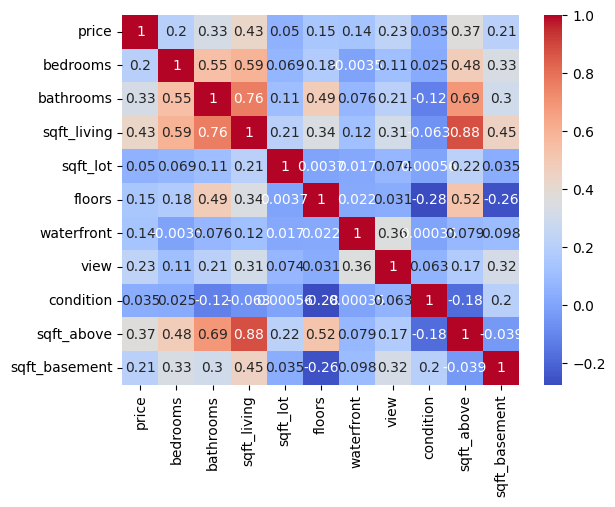

In [30]:
# Visualize Correlation between numerical features

df_numeric = df.select_dtypes(['int64','float64'])
sns.heatmap(data=df_numeric.corr(), annot=True, cmap='coolwarm')


In [31]:
df_continuous = [i for i in df.columns if df[i].dtypes!='object']
df_continuous

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement']

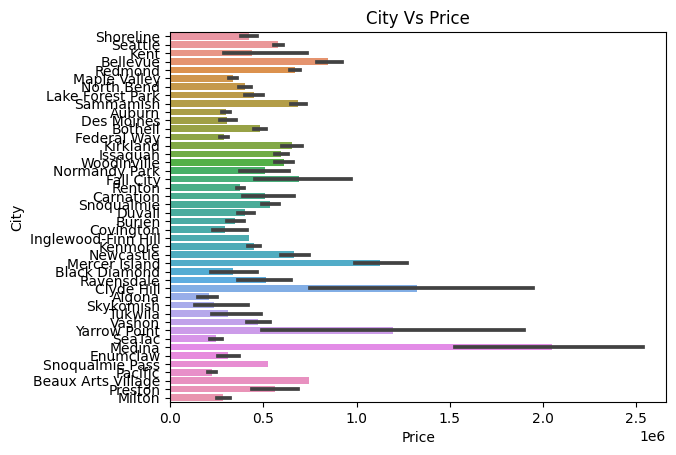

In [32]:
# Relationship b/w categorical variable and dependent variable

sns.barplot(data=data, x='price', y='city')
plt.ylabel('City')
plt.xlabel('Price')
plt.title('City Vs Price')
plt.show()

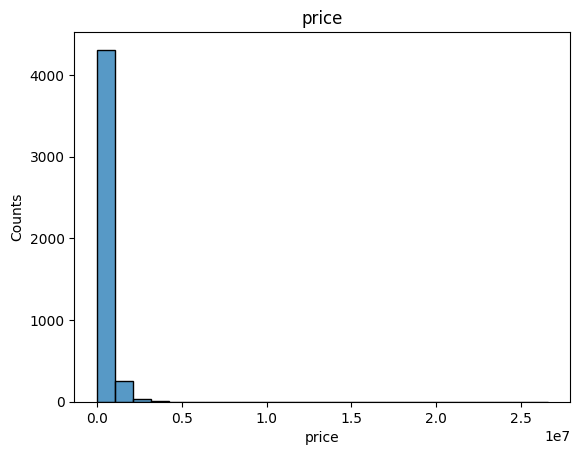

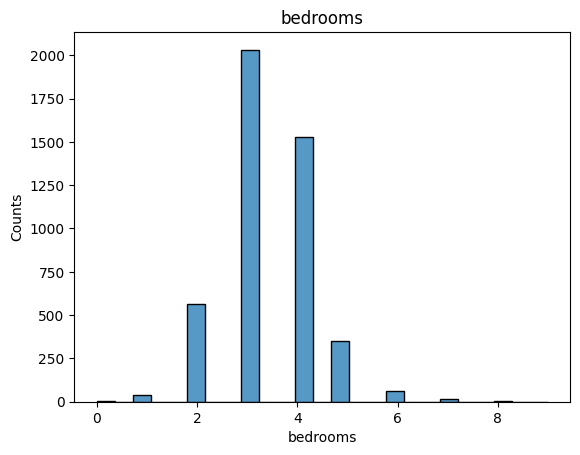

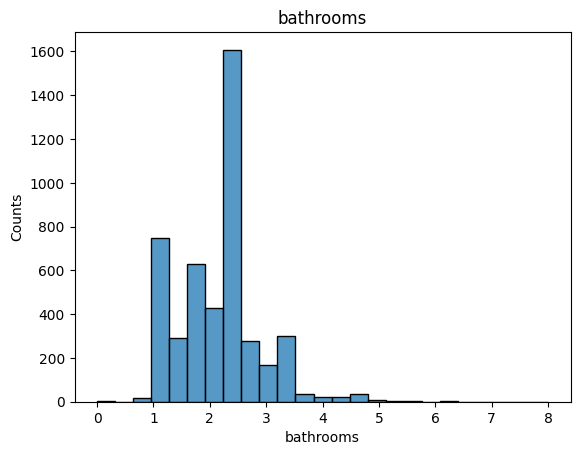

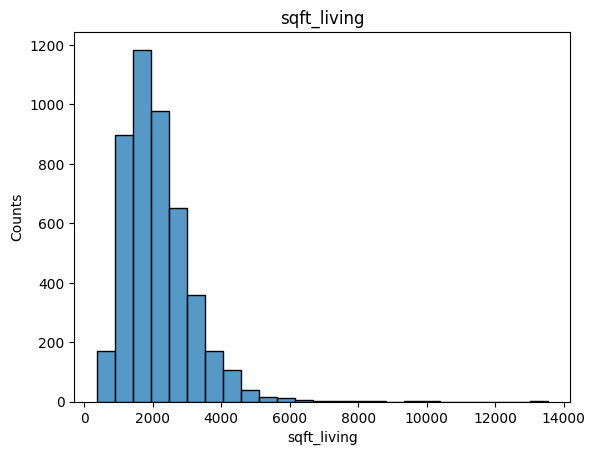

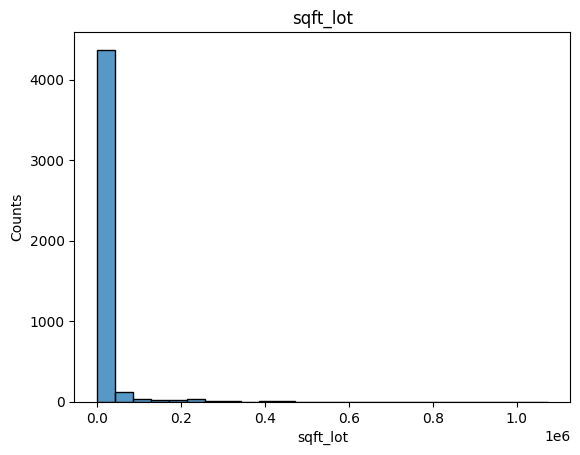

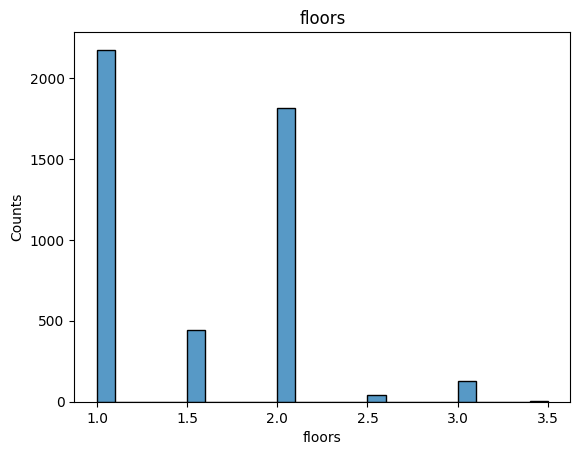

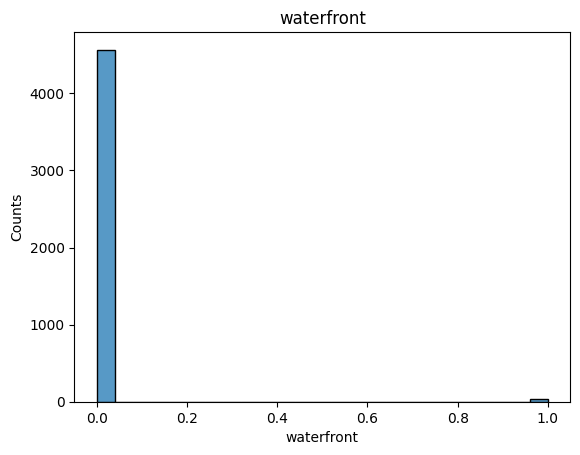

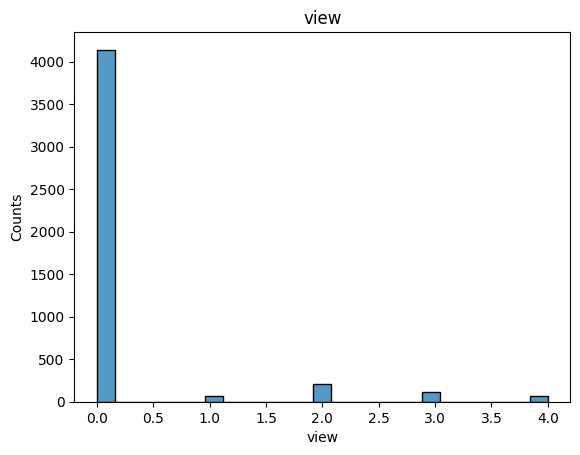

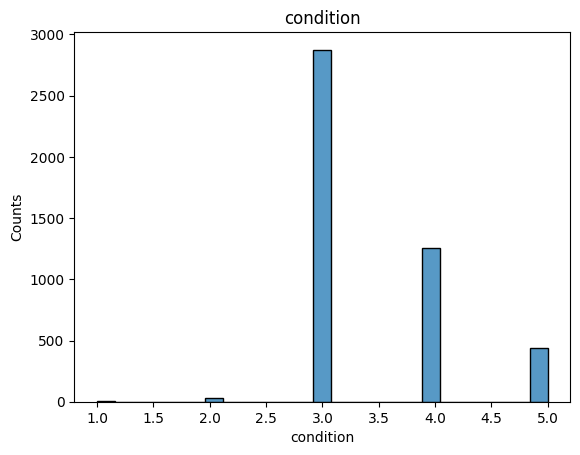

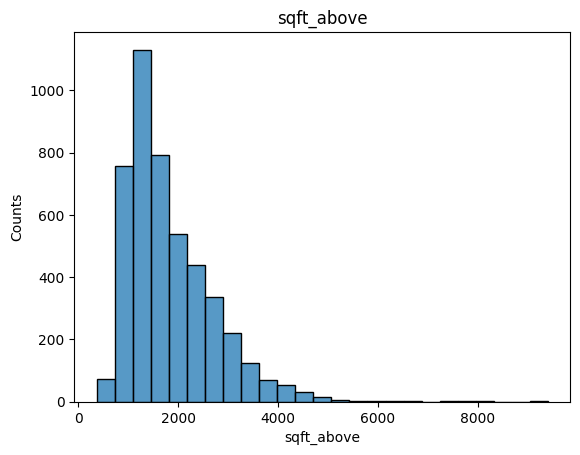

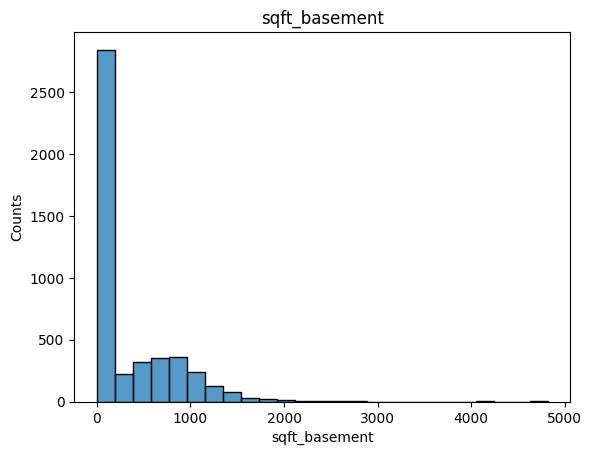

In [33]:
# Distribution of data

for i in df_continuous:
    sns.histplot(data=df[i], bins=25)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.show()

# Finding Outliers

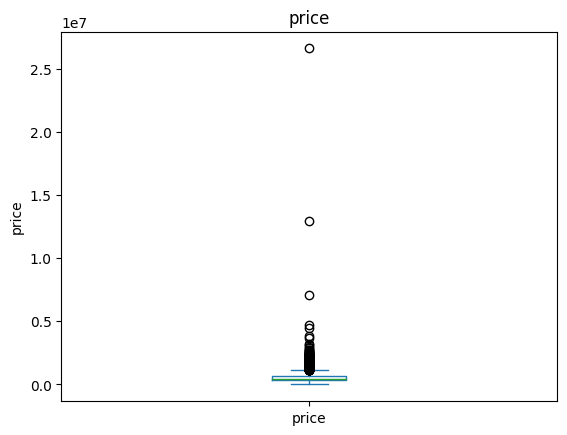

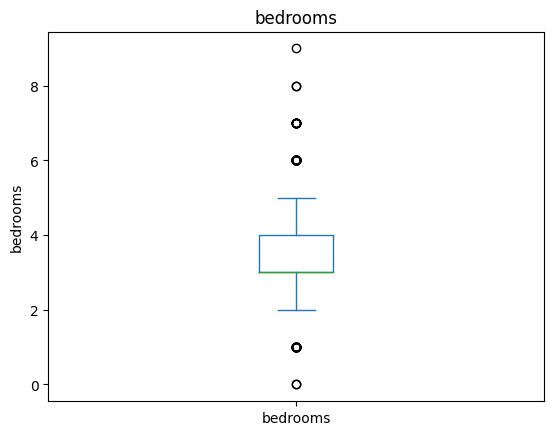

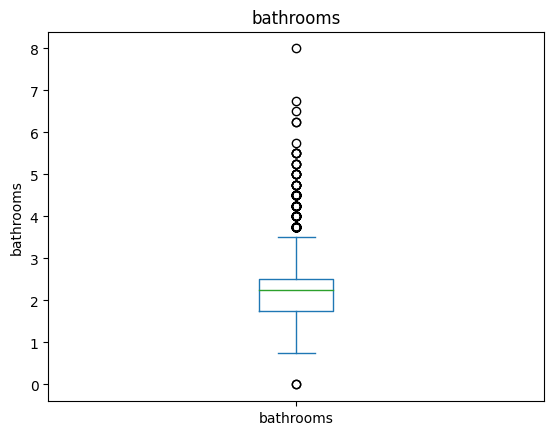

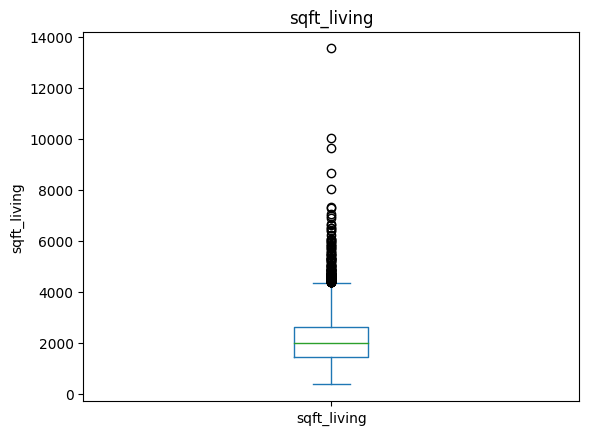

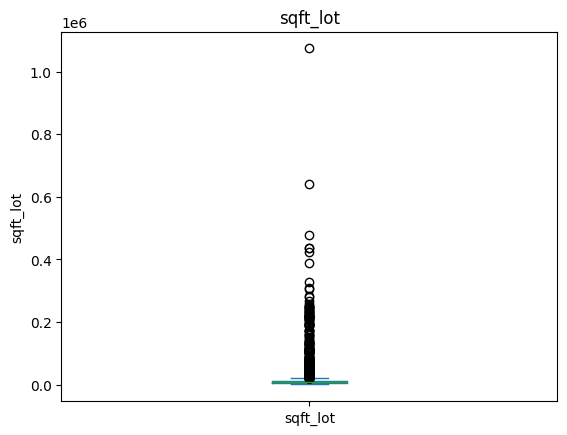

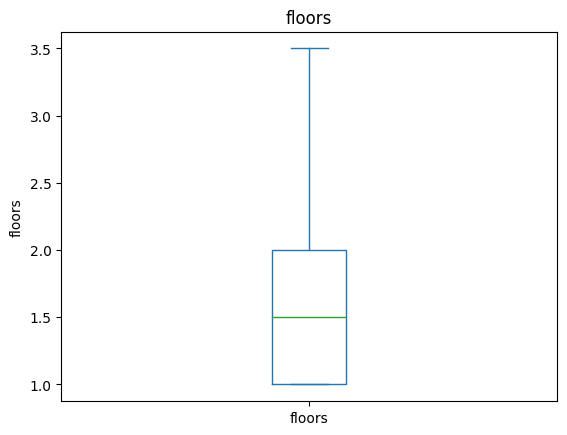

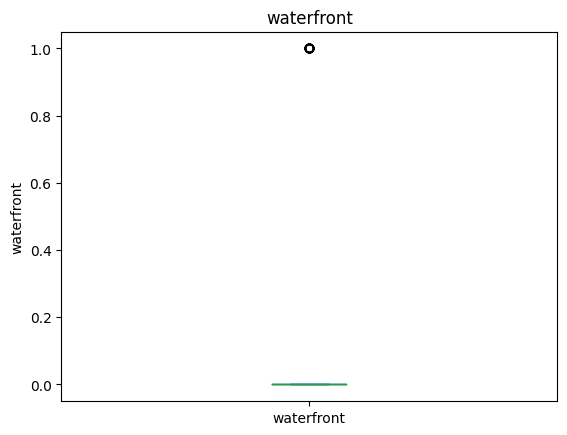

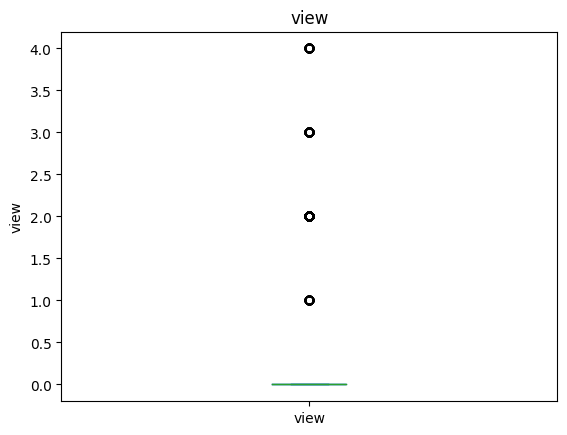

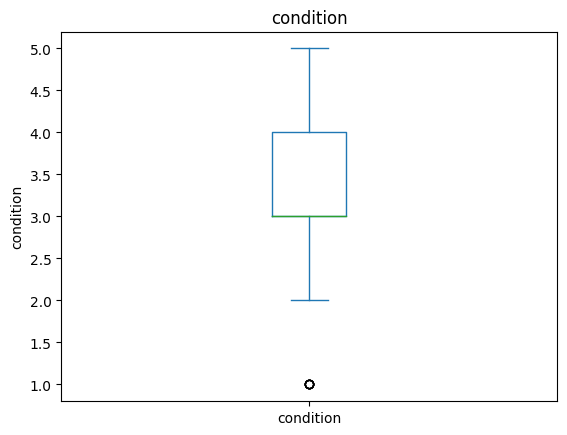

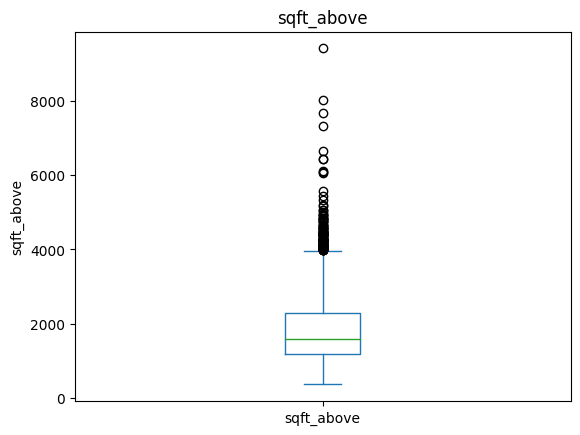

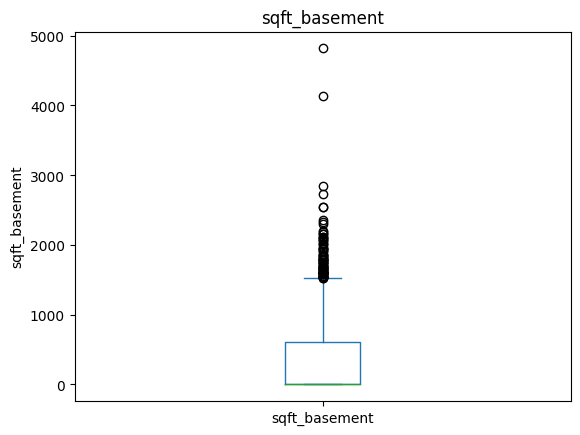

In [34]:
for i in df_continuous:
    
#     sns.boxplot(data=df[i])
    df[i].plot(kind='box')
    plt.ylabel(i)
    plt.title(i)
    plt.show()

In [35]:
# Checking for negative values

for i in df_continuous:
    if any(df[i]<0):
        print(i,': True')
    else:
        print(i,': False')
        

price : False
bedrooms : False
bathrooms : False
sqft_living : False
sqft_lot : False
floors : False
waterfront : False
view : False
condition : False
sqft_above : False
sqft_basement : False


In [36]:
# # Apply Standardization (z-score normalization)

df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement']]
df = (df - df.mean())/df.std()



# ----------Modelling----------

In [37]:
# Features and target variable seperation

x = df.iloc[:, df.columns!='price']
y = df['price']


In [155]:
# splitting X & y into train and test dataset

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=5)

# Gradient Descent (Linear Regression)

In [156]:
def cost_function(X, y, w, b):
    m,n = X.shape
    cost = 0
    
    for i in range(m):
        f_wb = np.dot(w,X[i]) + b
        cost = cost + (f_wb - y[i])**2
        
    cost = cost/(2*m)
        
    return cost


In [157]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    
    d_dw = np.zeros(n)
    d_db = 0
    
    for i in range(m):
        f_wb = np.dot(w,X[i]) + b
        
        for j in range(n):
            d_dw[j] = d_dw[j] + (f_wb - y[i])*X[i][j]   # for multiple features
        
        d_db = d_db + (f_wb - y[i])
        
    d_dw = d_dw/m
    d_db = d_db/m
    
    return d_dw,d_db
 


In [158]:
def gradient_descent(X, y, int_w, int_b, alpha, num_iterations):
    w = int_w
    b = int_b
    
    for _ in range(num_iterations):
        d_dw, d_db = compute_gradient(X, y, int_w, int_b)
        w = w - alpha*d_dw     
        b = b - alpha*d_db
    
    return w, b


In [159]:
int_w = np.zeros(x.shape[1])  # Slope
int_b = 0             # Bias
alpha = 0.01   # Learning rate
num_iterations = 30
X_check = np.array(X_train)
y_check = np.array(y_train)

optimal_w, optimal_b = gradient_descent(X_check, y_check,
                                        int_w, int_b,
                                        alpha, num_iterations)

print(optimal_w, optimal_b)

[0.06292434 0.10075936 0.1345747  0.01684624 0.04549186 0.04492683
 0.06701945 0.00932072 0.11553935 0.06465509] 0.0043766783949339486


In [160]:
# Half Mean squared Error

print('Final cost : {}'.format(cost_function(np.array(X_test),
                                             np.array(y_test),
                                             optimal_w,
                                             optimal_b)
                              )
     )

Final cost : 0.10174000726589937


# Linear Regression using sklearn 

In [161]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)


In [162]:
lr.score(X_train, y_train)

0.1691660309390075

In [163]:
lr.score(X_test, y_test)

0.509261027339986

In [166]:
from sklearn.metrics import mean_squared_error as mse
print('Mean Squared Error : {}'.format(mse(y_hat, y_test)))

Mean Squared Error : 0.1804900586056849


In [165]:
# Coefficient of Determination

from sklearn.metrics import r2_score
r2_score(y_hat, y_test)

0.057180647113226235

# Random Forest Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()

forest_model.fit(X_train, y_train)

y_hat = forest_model.predict(X_test)

In [152]:
mse(y_hat, y_test)

0.22665900187279817